## Latent Change Score Models (LCSMs)

### 1. Introduction
LCSMs represent a powerful extension of the observed-level change score models covered in the previous tutorial. The main difference between these two classes of models is the inclusion of **latent variables** for which we aim to estimate the change. The distinction between observed and latent variables is crucial as it represents one of the core advantages of using structural equation modeling (SEM) in general. When estimating latent variables measured by a set of indicators (observed variables at the measurement level), we are correcting for **measurement error**. In other words, by including latent variables in our analyses, we achieve results at the "true" score level. Consequently, with LCSMs we can assess the change of the true score on a given construct over time.


In [1]:
#######################################################
## Specify R environment for rpy2
#import os
#os.environ['R_HOME'] = r'C:/Program Files/R/R-4.4.3'  # Replace with your R path
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects import Formula
import contextlib
# Ipython extension for plotting
%load_ext rpy2.ipython
########################################################

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

c:\Users\danie\.conda\envs\psy112ER\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


### 2. Working Example 1

`fairplayer` is a data frame that contains information from a research project targeting **bullying** in a school: The variable names consist of one letter indicating the measurement source (s: self-report, t: teacher-report), two letters indicating each construct being measured (EM: empathy, RA: relational aggression, SI: social intelligence), a number indicating the item number on the scale, and a "t" followed by a number indicating the measurement occasion (time-point) (for more details see https://rdrr.io/cran/stuart/man/fairplayer.html). In addition, the variables IGS (short intervention) and IGL (long intervention) represent the kind of intervention groups to which the students belonged. These variables are dummy coded with 1 representing membership and 0 representing no membership. Thus, students with a 0 in both variables belong to the control group and did not experience any intervention. 

In other words, we have a data frame including 3 outcome variables (EM: empathy, RA: relational aggression, SI: social intelligence) measured by 2 different methods (self-report or teacher-report). 3 time-points (measurement occasions) for 3 different groups (1 control and 2 intervention groups). 

Please inspect the data frame to get familiar with the information that is included. Understanding the information in this data frame will help you to follow the modeling procedure. 

In [2]:
# Read the CSV file using a relative path
fairplayer = pd.read_csv("../LSCM_and_GCM/Datasets/fairplayer.csv")

# Display the first few rows of the dataframe
print(fairplayer.head())

   ratee  IGL  IGS  sEM01at1  sEM02at1  sEM03at1  tEM01at1  tEM02at1  \
1    1.0  1.0  0.0  3.666667  3.333333       4.5  4.666667  3.666667   
2    2.0  1.0  0.0  3.666667  4.333333       3.5  4.333333  4.000000   
3    3.0  1.0  0.0  3.000000  2.666667       2.5  4.333333  3.666667   
4    4.0  1.0  0.0  4.666667  4.666667       5.0  3.333333  3.333333   
5    5.0  1.0  0.0  3.000000  3.000000       3.5  1.333333  2.333333   

   tEM03at1  sEM01at2  ...  sRA03at2  tRA01at2  tRA02at2  tRA03at2  sRA01at3  \
1       5.0  3.666667  ...       1.0       1.0       2.0       1.0       1.0   
2       4.0  4.666667  ...       1.0       1.0       2.0       1.0       1.0   
3       4.0  2.666667  ...       1.0       1.0       1.5       1.0       1.5   
4       3.0  4.666667  ...       1.0       2.5       3.0       1.0       1.0   
5       1.0  3.000000  ...       1.0       2.0       3.0       2.0       1.5   

   sRA02at3  sRA03at3  tRA01at3  tRA02at3  tRA03at3  
1       2.5       1.0       1.0 

### 3. Model specification

Recall what you learned in the last tutorial. The only difference in specification of LCSMs as compared to CSMs is that we need to define latent variables measured by their multiple indicators (thus, the measurement models). Accordingly, we must specify factor loadings for the construct of interest. In addition, the latent **- now second order -** change score factor will be regressed onto the time 1 latent factor and explain variance in the time 2 latent factor. 

In the following example we are interested in assessing the change in *empathy* from time-point 1 to time-point 2. We fit the model using `lavaan`

In [4]:
# Activate pandas2ri for automatic conversion
pandas2ri.activate()

# Import the lavaan package in R
ro.r('library(lavaan)')

# Import semPlot for plotting SEM paths
ro.r('library(semPlot)')

# Load the dataset into R
ro.globalenv['fairplayer'] = pandas2ri.py2rpy(fairplayer)

# Define the SEM model
ro.r('''
lcsm1 <- '

# Defining a latent variable representing the construct Empathy at time 1 
emp1 =~ sEM01at1 + sEM02at1 + sEM03at1  

# Defining a latent variable representing the construct Empathy at time 2
emp2 =~ sEM01at2 + sEM02at2 + sEM03at2 

# Fixing the change score loading to 1
change =~ 1*emp2

#Fixing the regression of time 2 on time 1 to 1
emp2 ~ 1*emp1

#Fixing post-intervention score residual variance to 0
emp2 ~~ 0 * emp2  

#Fixing the intercept of one indicator per time-point to 0 to identify the mean structure
sEM01at2 ~ 0*1
sEM01at1 ~ 0*1


# Freely estimate the means of the change score phantom variable and the baseline (time 1). Per default, these are fixed to zero in lavaan
change ~ 1 
emp1 ~ 1

# Specify a covariance between the change score latent variable and the baseline (time 1)
change ~~ emp1
' 
''')


R[write to console]: This is lavaan 0.6-19
lavaan is FREE software! Please report any bugs.



### 4. Model Fitting

We can now fit the model specified above by using the `sem()` function. Then we examine the estimated parameters and plot a graphical overview of the model. 

lavaan 0.6-19 ended normally after 63 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        19

                                                  Used       Total
  Number of observations                           120         143

Model Test User Model:
                                                      
  Test statistic                                51.469
  Degrees of freedom                                 8
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                               348.774
  Degrees of freedom                                15
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.870
  Tucker-Lewis Index (TLI)                       0.756

Loglikelihood and Information Criteria:

  Loglikelihood user mod

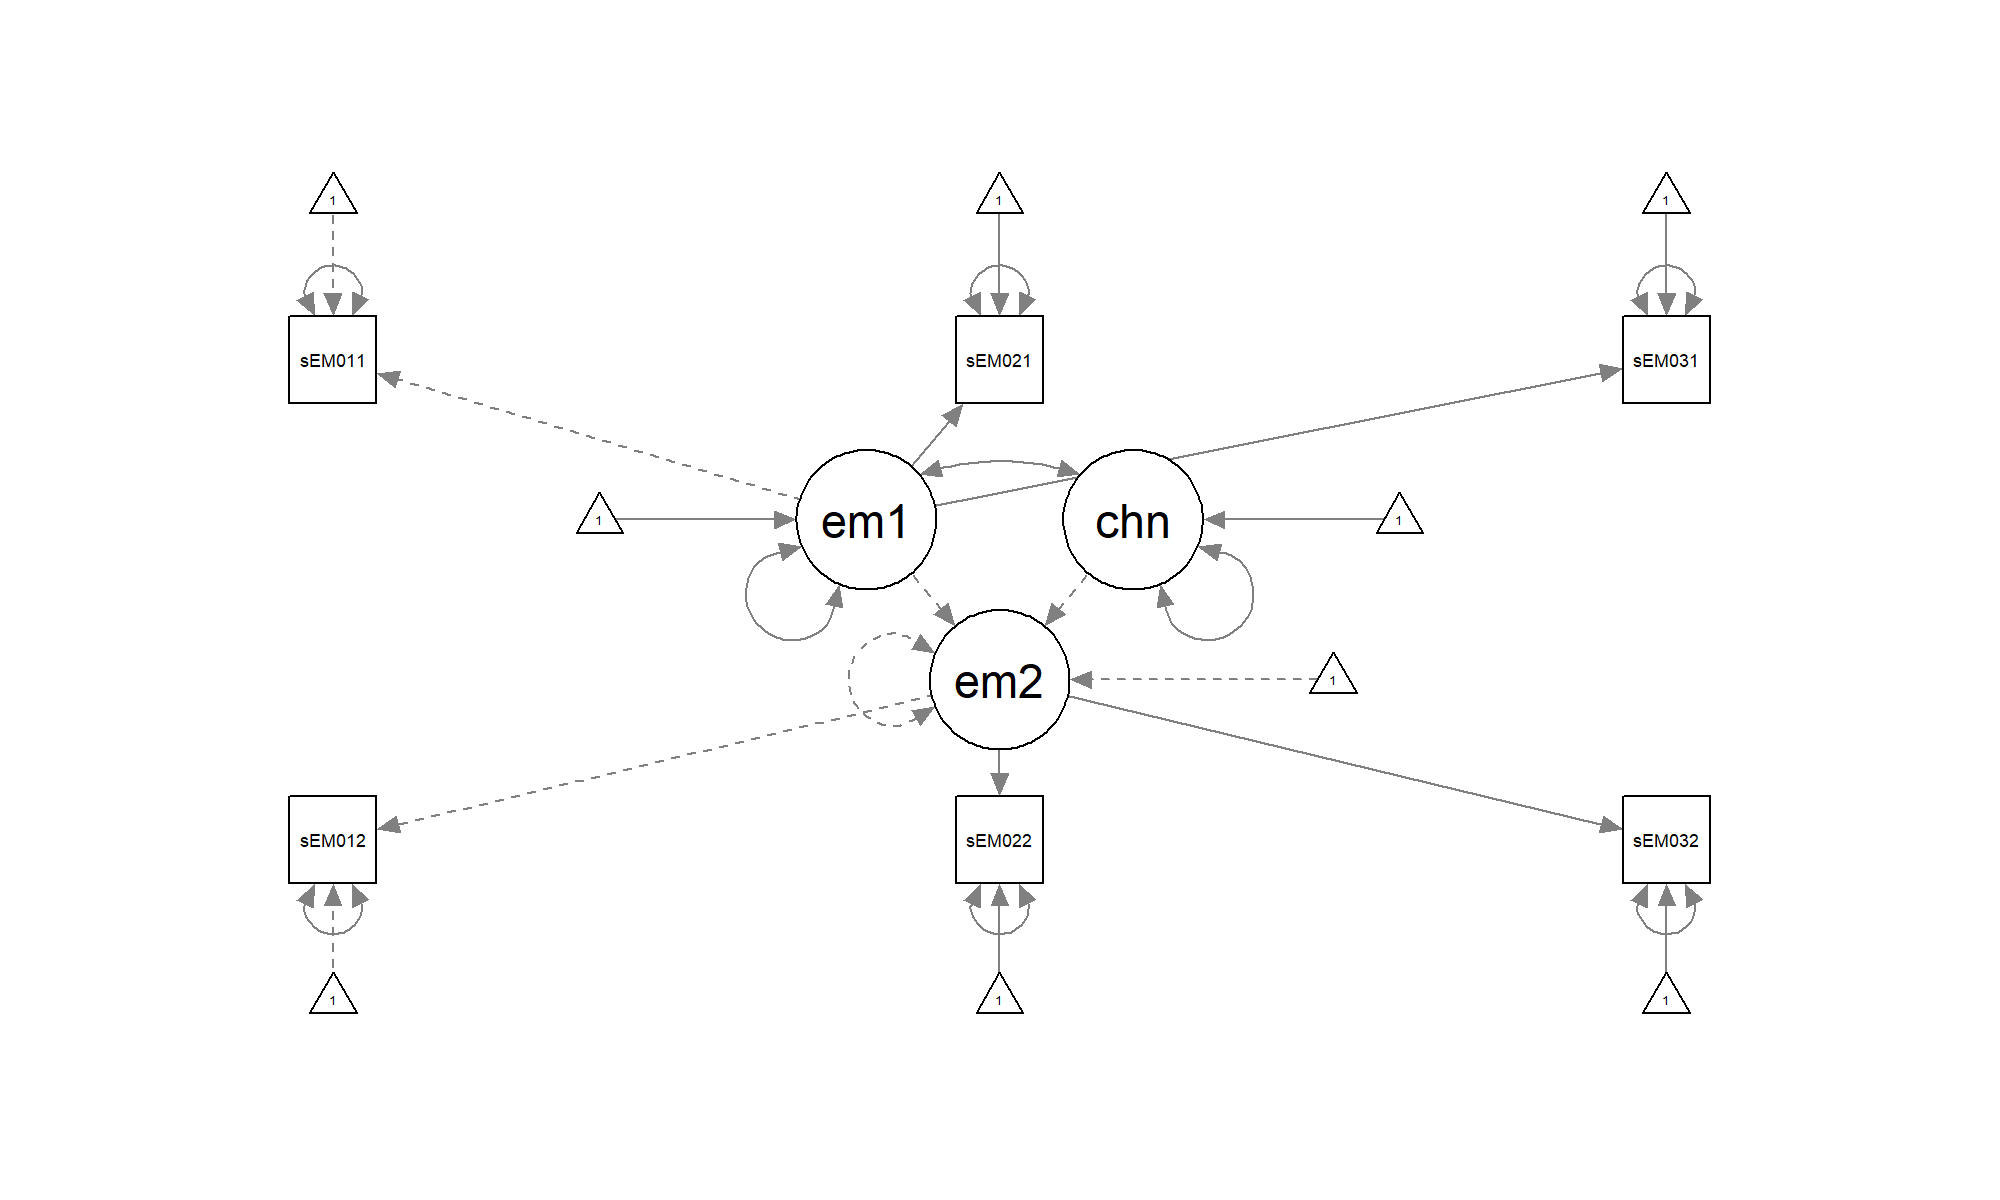

In [5]:
# Fit the SEM model
ro.r('fit5 <- sem(lcsm1, data=fairplayer, meanstructure=TRUE)')

# Display the summary of the SEM model
summary = ro.r('summary(fit5, fit.measures=TRUE, standardized=TRUE)')
print(summary)

# Save the SEM path diagram as a PNG file
ro.r('''
png("../LSCM_and_GCM/Datasets/semPath5.png", width = 2000, height = 1200, res = 150)
semPaths(fit5)
dev.off()
''')

# Display the saved SEM path diagram in Jupyter Notebook
display(Image(filename="../LSCM_and_GCM/Datasets/semPath5.png"))

### 5. Interpretation of the Latent Change Score Model

**Model Fit:**
The first and most critical step is to assess the model fit. Based on conventional standards, the fit of this model is **poor**.

* The **Chi-Square test** is significant (χ²(8) = 51.469, p < 0.001), which is an initial indication of misfit.
* The **CFI (0.870)** and **TLI (0.756)** are well below the acceptable threshold of >0.90, suggesting the model does not replicate the relationships in the data well.
* The **RMSEA is 0.213**, which is very high and indicates a poor approximation of the data (a good RMSEA is typically < 0.08).
* The only acceptable index is the **SRMR (0.063)**.

Given the poor overall fit, we must be **cautious** when interpreting the specific parameters below. A poor fit suggests that the model's underlying assumptions (e.g., the measurement structure of empathy, the nature of the change) may not be appropriate for this dataset.

**Means of the Latent Factors (The Intercepts):**
This section describes the average starting point and average change.
* The mean of the latent factor **`emp1`** is **3.883**. This is the estimated average level of latent empathy at the first time point.
* The mean of the latent **`change`** factor is **0.083**. While this suggests a small positive increase in empathy on average, this result is **not statistically significant** (p = 0.238). The primary conclusion here is that we have no statistical evidence of a systematic, average change in empathy for the group as a whole between the two time points.

**Variances of the Latent Factors:**
The variances show the degree of individual differences.
* The variance for the initial latent state (`emp1` = 0.235) is significant, meaning that students started with meaningfully different levels of empathy.
* The variance for the latent `change` factor (0.095) is also significant. This is an interesting finding. It means that even though the *average* change for the group was not significant, there were still significant individual differences in how empathy changed. Some students likely increased, others decreased, and these changes canceled each other out on average.

**Key LSCM Parameters:**
* **Covariance (`emp1 ~~ change`):** The covariance between the initial empathy level and the change factor is **-0.036**. This parameter is **not statistically significant** (p = 0.370). This indicates that a student's initial level of empathy was not significantly related to how much their empathy changed over time.

### 5. Refining the Model: Measurement Invariance and Correlated Residuals

The initial Latent Change Score Model was a good start, but it rested on strong assumptions. To build a more robust and methodologically sound model, we will now introduce two crucial refinements: formally testing for **measurement invariance** and accounting for **correlated residuals**.

#### Measurement Invariance (MI)

This is a critical concept for any longitudinal analysis.

* **What it is:** Measurement invariance is the statistical property that ensures our measurement instrument (the empathy scale) is measuring the **same underlying construct in the same way** at both time points. To claim that *empathy* has changed, we must first be confident that our *measurement* of empathy is stable.
* **How we test it here:** The `lcsm2` model takes the first step by testing for **metric invariance**. It achieves this by constraining the factor loadings for each corresponding item to be equal across time. You can see this in the model syntax:
    ```R
    emp1 =~ a*sEM01at1 + b*sEM02at1 + ...
    emp2 =~ a*sEM01at2 + b*sEM02at2 + ...
    ```
    The `a*` label forces the factor loading for the item `sEM01` to be the same at both `t1` and `t2` (and likewise for `b*` and `c*`). This tests the assumption that the items relate to the latent empathy construct consistently over time.

#### Correlated Residuals

The second refinement is adding what are known as correlated residuals or correlated errors.

* **What they are:** This refers to modeling the relationship between the measurement errors of the *same item* across time. You can see this specified in the syntax:
    ```R
    sEM01at1 ~~ sEM01at2
    sEM02at1 ~~ sEM02at2
    sEM03at1 ~~ sEM03at2
    ```
* **Why we include them:** We add these paths because we expect that any unique aspect of how a person responds to a specific item (that isn't due to their general empathy) will be somewhat consistent over time. For example, if a person uniquely interprets the phrasing of `sEM01` at `t1`, they will likely have a similar unique interpretation at `t2`. Accounting for this makes the model more realistic and the parameter estimates more accurate.

The `lcsm2` model below therefore represents a more sophisticated and appropriate model for analyzing this longitudinal data.

In [8]:
# Define the SEM model
ro.r('''
lcsm2 <- '

# Defining a latent variable representing empathy at time 1 
emp1 =~ a*sEM01at1 + b*sEM02at1 + c*sEM03at1 

# Defining a latent variable representing empathy at time 2
# a*, b* and c* indicate that the loading of the same indicator over time is fixed to equivalence with time 1
emp2 =~ a*sEM01at2 + b*sEM02at2 + c*sEM03at2 

# Fixing the loading of the change score to 1
change =~ 1*emp2

#Fixing the regression of time 2 on time 1 empathy to 1
emp2 ~ 1*emp1

#Fixing the residual variance of the post-intervention score to 0
emp2 ~~ 0 * emp2  

#Fixing the intercept of one indicator per timepoint to 0 in order to identify the mean structure
sEM01at2 ~ 0*1
sEM01at1 ~ 0*1

# Freely estimate phantom variable and baseline means. Per default, lavaan would fix them to 0
change ~ 1 
emp1 ~ 1

# Include covariance between change score variable and baseline
change ~~ emp1

# Autoregressive effects

sEM01at1 ~~ sEM01at2
sEM02at1 ~~ sEM02at2
sEM03at1 ~~ sEM03at2
'
''')


# Fit the SEM model
ro.r('fit6 <- sem(lcsm2, data=fairplayer, meanstructure=TRUE)')

# Display the summary of the SEM model
summary = ro.r('summary(fit6, fit.measures=TRUE, standardized=TRUE)')
print(summary)

lavaan 0.6-19 ended normally after 61 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        22
  Number of equality constraints                     2

                                                  Used       Total
  Number of observations                           120         143

Model Test User Model:
                                                      
  Test statistic                                 8.291
  Degrees of freedom                                 7
  P-value (Chi-square)                           0.308

Model Test Baseline Model:

  Test statistic                               348.774
  Degrees of freedom                                15
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.996
  Tucker-Lewis Index (TLI)                       0.992

Loglikelih

### 6. Interpretation of the Refined LSCM

**Model Fit:**
The fit of this refined model is **excellent**. This is a crucial finding, as it suggests that the new constraints we added (metric invariance and correlated residuals) have resulted in a model that represents the data very well.

Given this strong fit, we can interpret the model's parameters with a high degree of confidence.

**Measurement Invariance:**
A key feature of this model was the test for **metric invariance**, implemented by constraining the factor loadings to be equal across time (e.g., `a*`, `b*`, `c*`). Because the model achieved excellent fit *with* these constraints in place, we have strong evidence that metric invariance holds. This is a very important conclusion: it means that the empathy indicators relate to the latent empathy construct in the same way at both time points. This gives us a solid foundation for interpreting the change itself.

**Means of the Latent Factors (The Intercepts):**
* The mean of the latent factor **`emp1`** is **3.883**. This is the average level of latent empathy for the sample at `t1`.
* The mean of the latent **`change`** factor is **0.083**. This average change is **not statistically significant** (p = 0.118). Therefore, despite the positive estimate, we cannot conclude there was a systematic average increase or decrease in empathy for the group as a whole.

**Variances of the Latent Factors:**
* The variances for the initial latent state (`emp1` = 0.233) and the latent change score (`change` = 0.123) are both statistically significant (p < 0.001). This tells us that there are meaningful individual differences in both the starting levels of empathy and in the amount that empathy changed from `t1` to `t2`.

**Key LSCM Parameters (Covariances):**
This section contains some of the most important findings of the refined model.
* **Covariance (`emp1 ~~ change`):** The covariance between the initial state (`emp1`) and the change factor (`change`) is **-0.063**, and this relationship is **statistically significant** (p = 0.014). This is a key finding that was not apparent in the previous, poorly-fitting model. The significant negative value means that the initial level of empathy is predictive of the subsequent change. Specifically, individuals who started with higher levels of empathy tended to show less positive change in empathy over time.
* **Correlated Residuals:** The model allowed the errors of the same items to correlate over time. The error for the first item (`sEM01at1 ~~ sEM01at2`) was significantly correlated (p < 0.001), justifying its inclusion and suggesting this item has a stable uniqueness not captured by the general empathy factor. The other two were not significant, but including them as a set contributed to the overall excellent model fit.